<a href="https://colab.research.google.com/github/LeMagnifiq/WaterPotabilityPredictor/blob/main/water_quality_and_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Prediction of Water Portability

## Downloading Dataset

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lemagnifiq","key":"8d03255afa4acff15e58b719f0ee8da4"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d uom190346a/water-quality-and-potability

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 84.9MB/s]


In [5]:
!unzip water-quality-and-potability.zip

Archive:  water-quality-and-potability.zip
  inflating: water_potability.csv    


## Libraries


In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Dataset

In [7]:
water_df = pd.read_csv('water_potability.csv')

## Data Exploration

In [8]:
# Display the first few rows of the dataset
print(water_df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [9]:
# Summary statistics of numerical columns
print(water_df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


In [10]:
# Check for missing values
print(water_df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


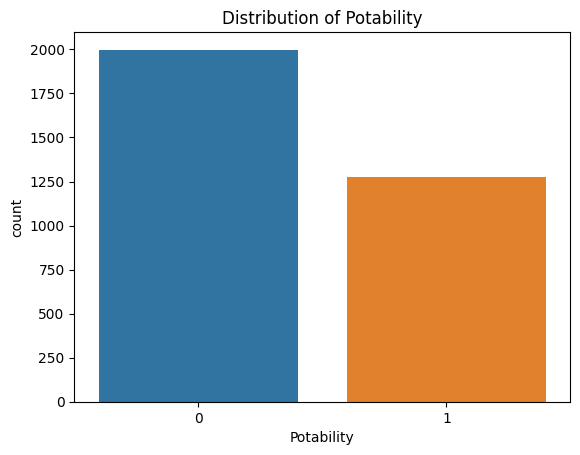

In [11]:
# Visualize the distribution of the target variable
sns.countplot(x='Potability', data=water_df)
plt.title('Distribution of Potability')
plt.show()

In [14]:
# Display the distribution of the target variable
print("Distribution of Potability:")
print(water_df['Potability'].value_counts())

Distribution of Potability:
0    1998
1    1278
Name: Potability, dtype: int64


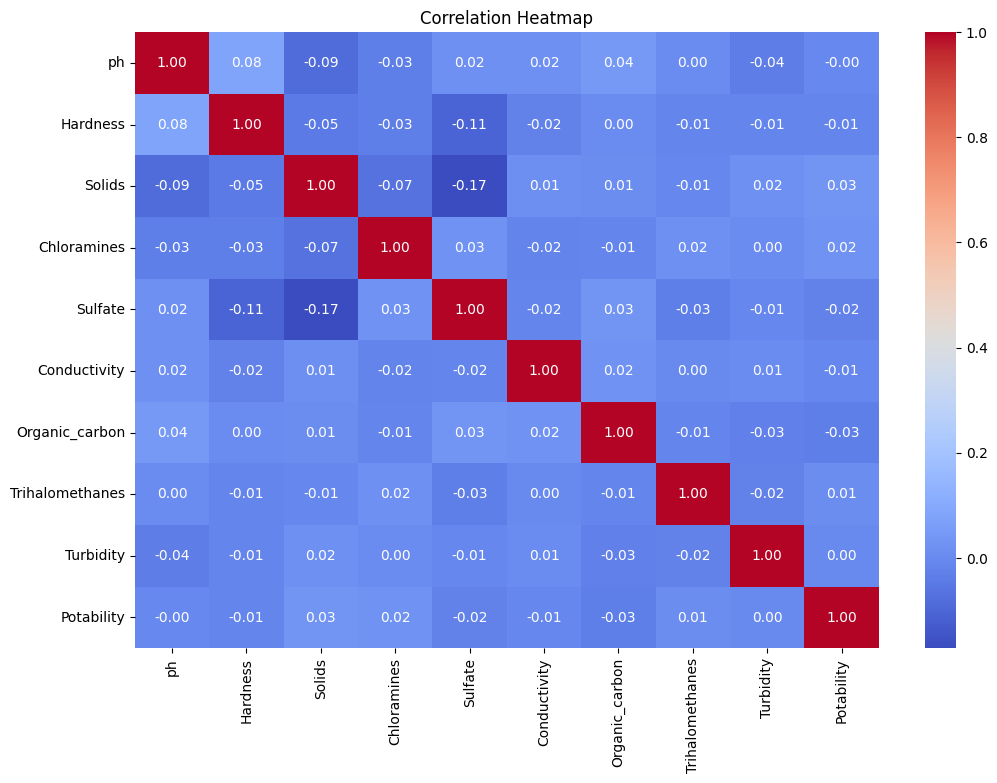

In [13]:
# Correlation heatmap for numerical features
correlation_matrix = water_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Display the correlation matrix
print("Correlation Matrix:")
print(water_df.corr())

Correlation Matrix:
                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915    

## Data Cleaning

In [16]:
# Impute missing values
water_df['ph'].fillna(water_df['ph'].mean(), inplace=True)
water_df['Sulfate'].fillna(water_df['Sulfate'].median(), inplace=True)
water_df['Trihalomethanes'].fillna(water_df['Trihalomethanes'].mean(), inplace=True)

In [17]:
# Check again for missing values
print("Count of Missing Values after Imputation:")
print(water_df.isnull().sum())

Count of Missing Values after Imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


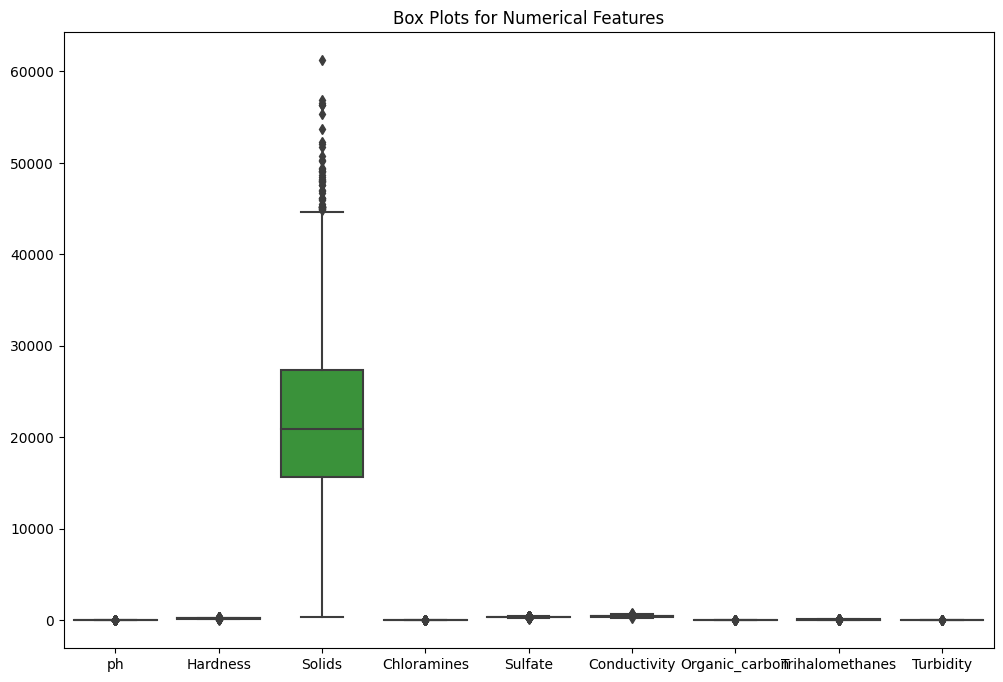

In [18]:
# Check for outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=water_df.drop(columns=['Potability']))
plt.title('Box Plots for Numerical Features')
plt.show()

In [19]:
# Identify outliers using IQR method
def find_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# Find and display outliers for each numerical feature
outliers_dict = {}
for column in water_df.select_dtypes(include=np.number).columns:
    outliers = find_outliers_iqr(water_df[column])
    outliers_dict[column] = outliers.sum()

# Display the count of outliers for each feature
print("Count of Outliers for Numerical Features:")
print(pd.Series(outliers_dict))

Count of Outliers for Numerical Features:
ph                 142
Hardness            83
Solids              47
Chloramines         61
Sulfate            264
Conductivity        11
Organic_carbon      25
Trihalomethanes     54
Turbidity           19
Potability           0
dtype: int64


## Data Split

In [20]:
# Step 1: Splitting the Data
X = water_df.drop(columns=['Potability'])
y = water_df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature Scaling

In [21]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled features
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (2620, 9)
Shape of X_test_scaled: (656, 9)


# Model Training

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Step 4: Model Training (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 5: Model Evaluation
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.6554878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.88      0.76       400
           1       0.62      0.30      0.41       256

    accuracy                           0.66       656
   macro avg       0.64      0.59      0.58       656
weighted avg       0.65      0.66      0.62       656


Confusion Matrix:
 [[352  48]
 [178  78]]


### Gradient Descent

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Evaluate the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test_scaled)

# Display evaluation metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Display evaluation metrics for Gradient Boosting
print("Gradient Boosting Model Evaluation:")
print("Accuracy:", accuracy_gb)
print("\nClassification Report:\n", classification_rep_gb)
print("\nConfusion Matrix:\n", conf_matrix_gb)

Gradient Boosting Model Evaluation:
Accuracy: 0.6509146341463414

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.91      0.76       400
           1       0.64      0.25      0.35       256

    accuracy                           0.65       656
   macro avg       0.64      0.58      0.56       656
weighted avg       0.65      0.65      0.60       656


Confusion Matrix:
 [[364  36]
 [193  63]]


## Feature Importance

In [24]:
# Gradient Boosting Feature Importance
gb_feature_importance = gb_model.feature_importances_

# Create a DataFrame to display feature importance
gb_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb_feature_importance})
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance for Gradient Boosting
print("\nGradient Boosting Feature Importance:")
print(gb_feature_importance_df)


Gradient Boosting Feature Importance:
           Feature  Importance
0               ph    0.265391
4          Sulfate    0.204127
3      Chloramines    0.129757
2           Solids    0.106871
1         Hardness    0.105313
5     Conductivity    0.060565
6   Organic_carbon    0.047732
8        Turbidity    0.045923
7  Trihalomethanes    0.034322


### Ensemble Approach: Gradient Descent and Random Forest

In [25]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble of Random Forest and Gradient Boosting models
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model)
], voting='soft')  # 'soft' for probability-based voting

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Display evaluation metrics for the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_rep_ensemble = classification_report(y_test, y_pred_ensemble)
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Display evaluation metrics for the ensemble model
print("Ensemble Model (Random Forest + Gradient Boosting) Evaluation:")
print("Accuracy:", accuracy_ensemble)
print("\nClassification Report:\n", classification_rep_ensemble)
print("\nConfusion Matrix:\n", conf_matrix_ensemble)

Ensemble Model (Random Forest + Gradient Boosting) Evaluation:
Accuracy: 0.6859756097560976

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78       400
           1       0.72      0.32      0.44       256

    accuracy                           0.69       656
   macro avg       0.70      0.62      0.61       656
weighted avg       0.69      0.69      0.65       656


Confusion Matrix:
 [[368  32]
 [174  82]]
